# BooksNN - Test MSE from ideal trend as way to quantify seasonality

Another test of a simple conventional measure to classify the behavior of seasonal books. Does the mean squared error (MSE) between a single ASIN's series and the ideal trend give enough info for classification?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyisbn #module for converting ISBN-13 to ISBN-10 and vice versa
import booksnn as bnn

from sklearn.metrics import mean_squared_error


## Load data - average trends
Either load from database, or load average trends from csv. 
Warning: If reading from database, this could take some time. 500 ASINs already takes several minutes. 

In [13]:
## LOAD single year ideal trends from csv
up_year = pd.read_csv('./stats/up_year.csv',index_col='index')
uc_year = pd.read_csv('./stats/uc_year.csv',index_col='index')
sr_year = pd.read_csv('./stats/sr_year.csv',index_col='index')

up_year_sm = pd.read_csv('./stats/up_year_sm.csv',index_col='index')
uc_year_sm = pd.read_csv('./stats/uc_year_sm.csv',index_col='index')
sr_year_sm = pd.read_csv('./stats/sr_year_sm.csv',index_col='index')

In [19]:
## LOAD ALL SERIES FROM DB
asins_in_db = bnn.get_asin_list()
print('Total number of ASINs in database: ' + str(len(asins_in_db)))
asins = asins_in_db[0:20] #select a subset if desired
print('Total number of ASINs selected: ' + str(len(asins))+'\n')


# Check if mean price and salesrank in last year was high/low enough. If not, move products to 
# a second database for rejects. 

startdate = '2017-01-01'
enddate = '2020-12-08'
up = bnn.dicts_to_dataframe(bnn.get_usedprice(asins),startdate,enddate)
uc = bnn.dicts_to_dataframe(bnn.get_usedcount(asins),startdate,enddate)
sr = bnn.dicts_to_dataframe(bnn.get_salesrank(asins),startdate,enddate)

#take the log of salesrank
sr = np.log(sr)

Total number of ASINs in database: 577
Total number of ASINs selected: 20



### Normalize series

Zero center and unit variance.

In [20]:
scaler,up = bnn.normalize(up)
scaler,uc = bnn.normalize(uc)
scaler,sr = bnn.normalize(sr)

### Calculate MSE of time series vs ideal

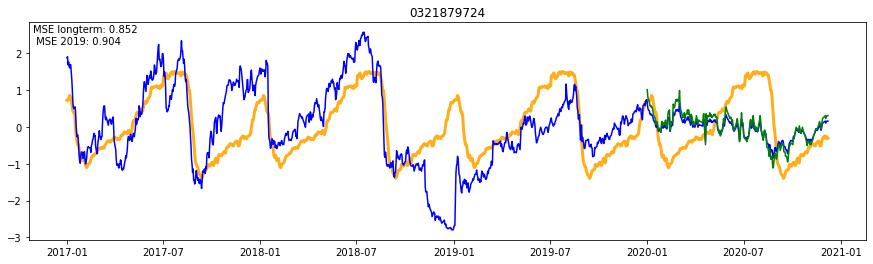

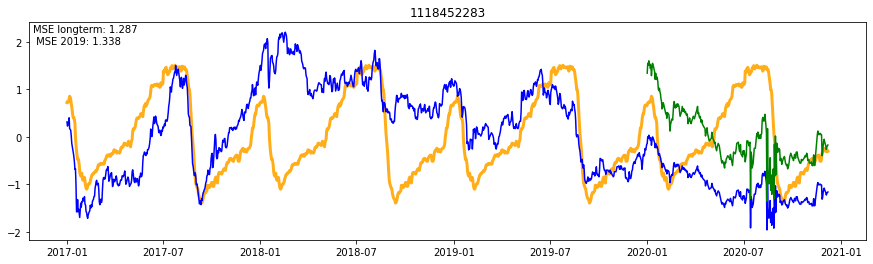

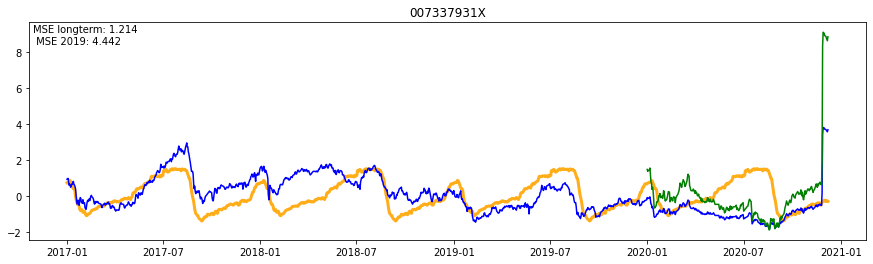

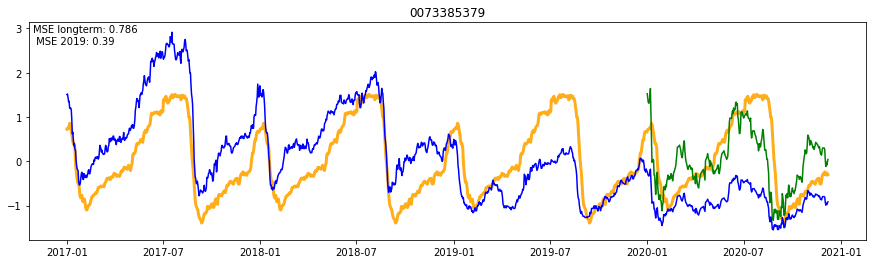

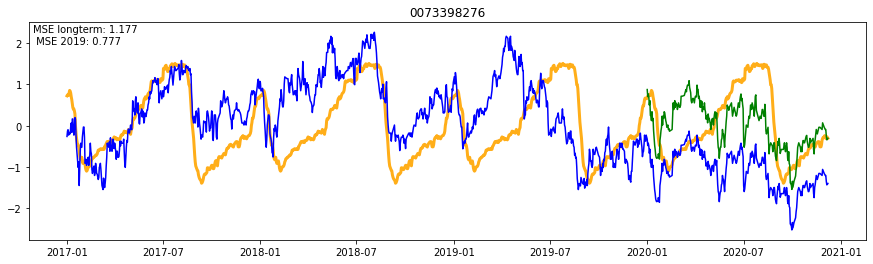

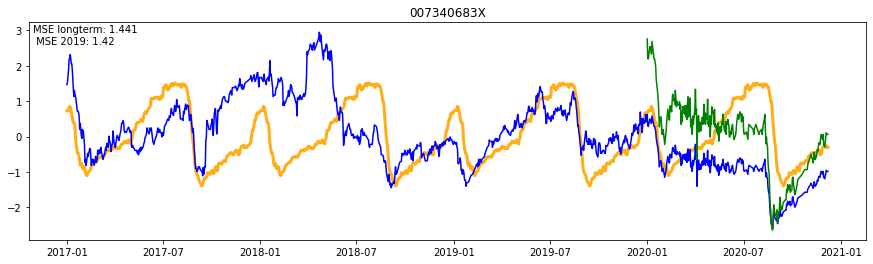

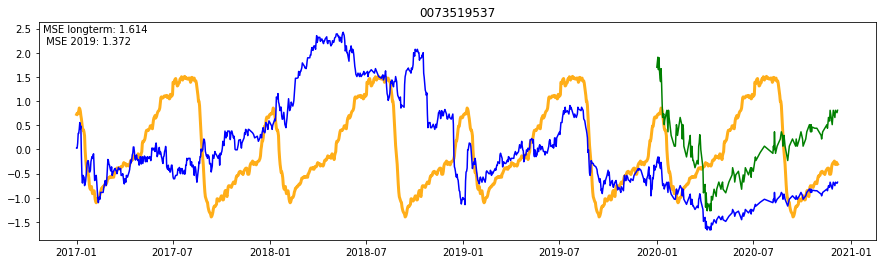

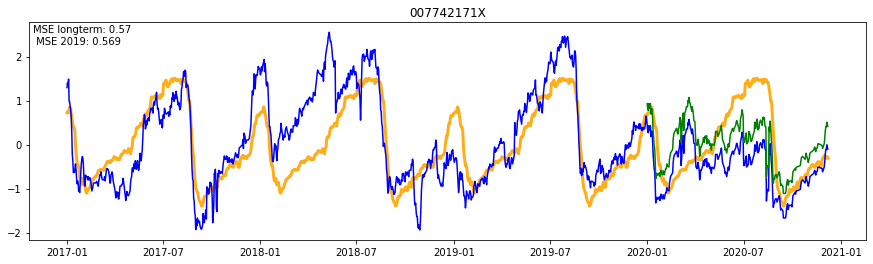

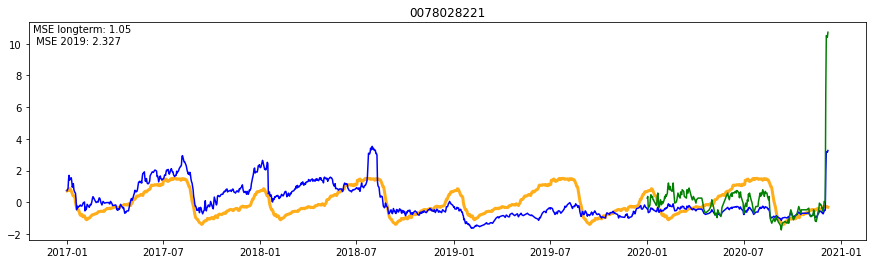

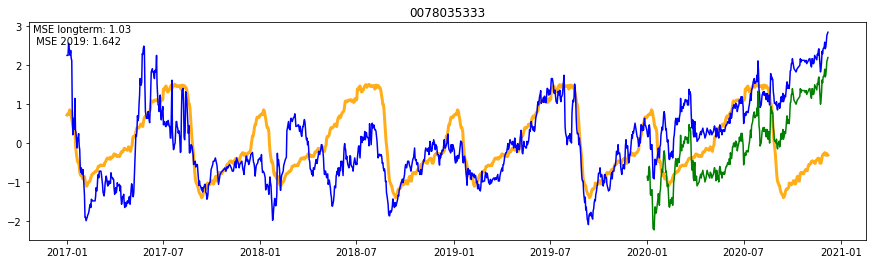

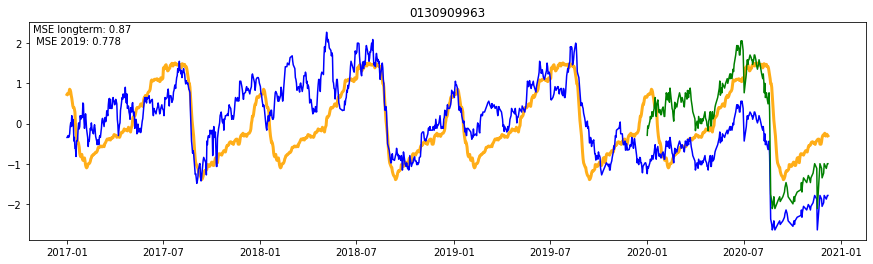

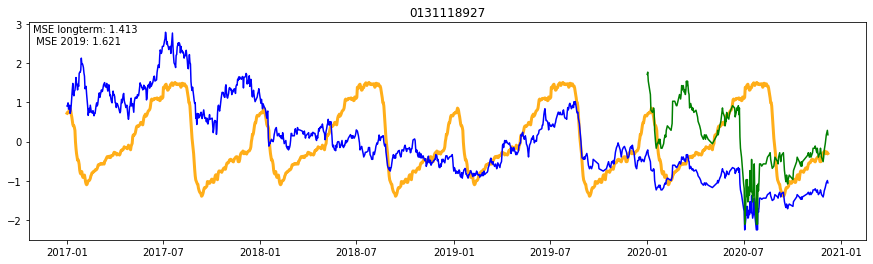

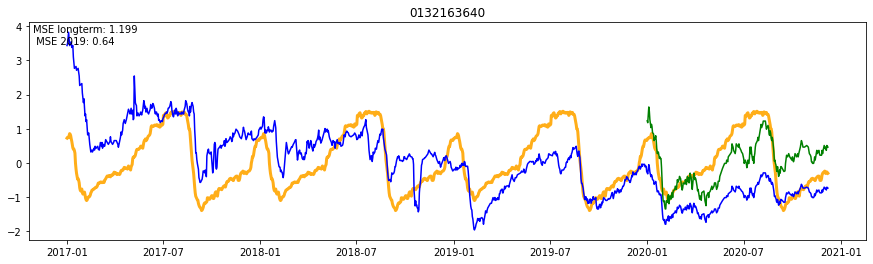

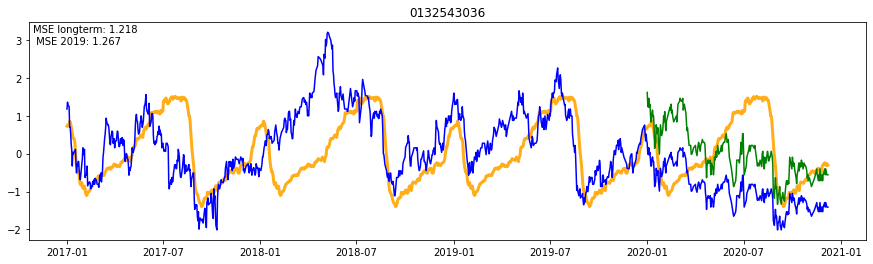

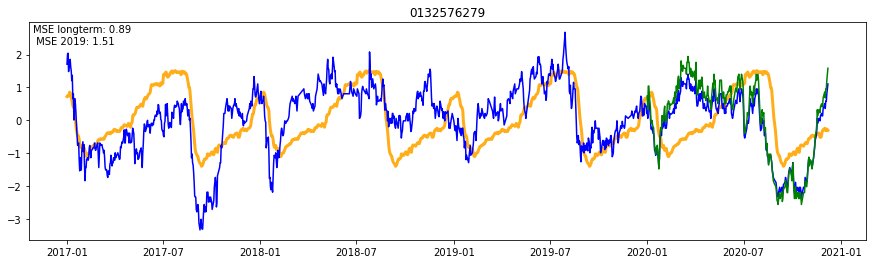

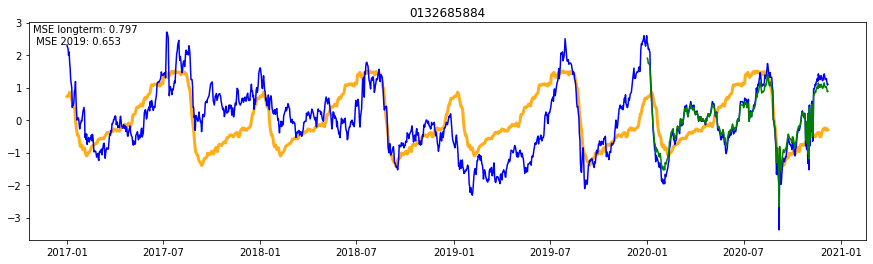

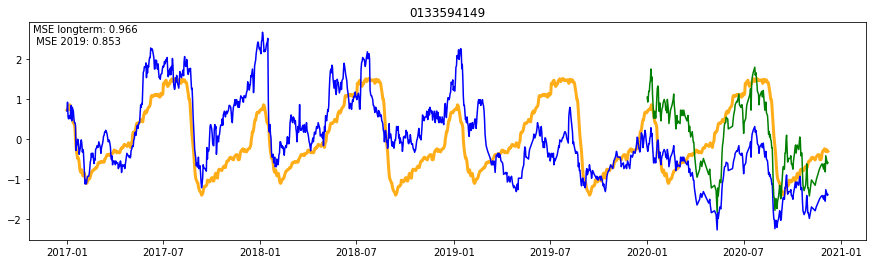

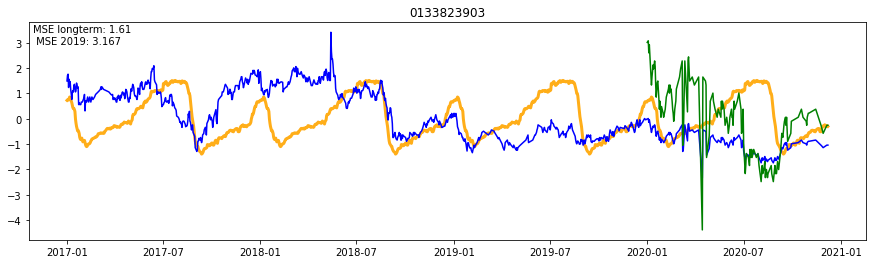

In [24]:
#year_range = (pd.to_datetime('2019-12-05', format='%Y-%m-%d'), enddate = pd.to_datetime('2020-12-05', format='%Y-%m-%d'))

for asin in up.columns:
    up_lastyear = (up[asin][up.index.year==2020]-np.mean(up[asin][up.index.year==2020]))/np.std(up[asin][up.index.year==2019])
    up_mse_longtime = round(mean_squared_error(bnn.rep_partial_years(up_year,up[asin]),up[asin]),3)
    up_mse_lastyear = round(mean_squared_error(bnn.rep_partial_years(up_year,up_lastyear),up_lastyear),3)
    
    uc_lastyear = (uc[asin][uc.index.year==2020]-np.mean(uc[asin][uc.index.year==2020]))/np.std(uc[asin][uc.index.year==2019])
    uc_mse_longtime = round(mean_squared_error(bnn.rep_partial_years(uc_year,uc[asin]),uc[asin]),3)
    uc_mse_lastyear = round(mean_squared_error(bnn.rep_partial_years(uc_year,uc_lastyear),uc_lastyear),3)
    
    sr_lastyear = (sr[asin][sr.index.year==2020]-np.mean(sr[asin][sr.index.year==2020]))/np.std(sr[asin][sr.index.year==2019])
    sr_mse_longtime = round(mean_squared_error(bnn.rep_partial_years(sr_year,sr[asin]),sr[asin]),3)
    sr_mse_lastyear = round(mean_squared_error(bnn.rep_partial_years(sr_year,sr_lastyear),sr_lastyear),3)
    
    fig = plt.figure(figsize=(15,4))
    plt.plot(bnn.rep_partial_years(uc_year_sm,uc[asin]),linewidth=3,alpha=.9,c='orange')
    plt.plot(uc[asin],c='blue')
    plt.plot(uc_lastyear,c='green')
    msetext = 'MSE longterm: '+str(uc_mse_longtime)+'\n MSE 2019: '+str(uc_mse_lastyear)
    '''
    #Usedprice
    fig = plt.figure(figsize=(15,4))
    plt.plot(bnn.rep_partial_years(up_year_sm,up[asin]),linewidth=3,alpha=.9,c='orange')
    plt.plot(up[asin],c='blue')
    plt.plot(up_lastyear,c='green')
    msetext = 'MSE longterm: '+str(up_mse_longtime)+'\n MSE 2019: '+str(up_mse_lastyear)

    # Usedcount
    fig = plt.figure(figsize=(15,4))
    plt.plot(bnn.rep_partial_years(uc_year_sm,uc[asin]),linewidth=3,alpha=.9,c='orange')
    plt.plot(uc[asin],c='blue')
    plt.plot(uc_lastyear,c='green')
    msetext = 'MSE longterm: '+str(uc_mse_longtime)+'\n MSE 2019: '+str(uc_mse_lastyear)

    
    # Salesrank
    fig = plt.figure(figsize=(15,4))
    plt.plot(bnn.rep_partial_years(sr_year_sm,sr[asin]),linewidth=3,alpha=.9,c='orange')
    plt.plot(sr[asin],c='blue')
    plt.plot(sr_lastyear,c='green')
    msetext = 'MSE longterm: '+str(sr_mse_longtime)+'\n MSE 2019: '+str(sr_mse_lastyear)

    '''
    plt.title(asin) 
    
    plt.annotate(msetext,
            xy=(0, 0.5),
            xycoords='axes fraction',
            xytext=(0.005, 0.9))
    
    # Define thresholds for interesting products
    longtime_up_mse_threshold = 1.5
    lastyear_up_mse_threshold = 1.2
    
    
    
    #print('Used price')
    #print('MSE, data & year avg:' + \
    #      str(mean_squared_error(bnn.rep_partial_years(up_year,up[asin]),up[asin])))
    #print('MSE, data & statsmodels: ' + \
    #      str(mean_squared_error(bnn.rep_partial_years(up_year_sm,up[asin]),up[asin])))
